In [2]:
import viennals2d as vls
import viennaps2d as vps

import matplotlib.pyplot as plt
import numpy as np

vps.Logger.setLogLevel(vps.LogLevel.INFO)

In [3]:
def print_levelsets(domain, prefix="cvd_"):
    levelsets = domain.getLevelSets()
    for i, ls in enumerate(levelsets):
        mesh = vls.lsMesh()
        vls.lsToSurfaceMesh(ls, mesh).apply()
        vls.lsVTKWriter(mesh, prefix + str(i) + ".vtp").apply()


In [4]:
domain = vps.Domain()
vps.MakeTrench(domain=domain, 
               gridDelta=2.5, 
               xExtent=80., 
               yExtent=0., 
               trenchWidth=30., 
               trenchDepth=50., 
               taperingAngle=5., 
               material=vps.Material.Si).apply() 
# domain.saveVolumeMesh("initial")

domain.duplicateTopLevelSet(vps.Material.SiO2)

iso = vps.IsotropicProcess(1.)
vps.Process(domain, iso, 10.).apply()
# domain.saveVolumeMesh("final")

# print_levelsets(domain)

    Remaining time: 10.000000
    Remaining time: 9.076833
    Remaining time: 8.193126
    Remaining time: 7.280228
    Remaining time: 6.396521
    Remaining time: 5.512815
    Remaining time: 4.580488
    Remaining time: 3.696781
    Remaining time: 2.813075
    Remaining time: 1.877506
    Remaining time: 0.993799
    Remaining time: 0.110092


In [7]:
# Access the level set object
ls_substrate = domain.getLevelSets()[0]
ls_deposited = domain.getLevelSets()[1]

# Generate surface meshes
mesh_substrate = vls.lsMesh()
vls.lsToSurfaceMesh(ls_substrate, mesh_substrate).apply()

mesh_deposited = vls.lsMesh()
vls.lsToSurfaceMesh(ls_deposited, mesh_deposited).apply()

In [8]:
mesh_ls = vls.lsMesh()
vls.lsToMesh(ls_substrate, mesh_ls).apply()
vls.lsVTKWriter(mesh_ls, "cvd_ls.vtp").apply()

In [9]:
print(mesh_ls.getCellData().getScalarData("LSValues"))

[-0.9999999, -0.9999999, -0.9999999, -0.9999999, -0.9999999, -0.9999999, -0.9999999, -0.9999999, -0.9999999, -0.9999999, -0.9999999, -0.9999999, -0.9999999, -0.9125112452229428, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.9125112452229428, -0.9125112452229428, 0.0874886547770572, 0.0874886547770572, -0.9125112452229428, -0.8250225904458848, 0.17497730955411528, 0.17497730955411528, -0.8250225904458848, -0.7375339356688275, 0.2624659643311725, 0.2624659643311725, -0.7375339356688275, -0.6500452808917695, 0.34995461910823056, 0.34995461910823056, -0.6500452808917695, -0.5625566261147114, 0.4374432738852887, 0.4374432738852887, -0.5625566261147114, -0.47506797133765416, 0.5249319286623458, 0.5249319286623458, -0.47506797133765416, -0.3875793165605961, 0.612420583439404, 0.612420583439404, -0.3875793165605961, -0.300090661783538, 0.699909238216462, 0.699909238216462, -0.300090661783538, -0.21260200700648169, 0.7873978929935184, 0.7873978929935184, -0.212602007006481

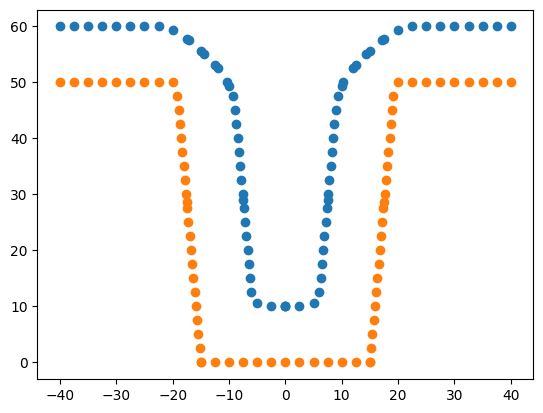

In [10]:
nodes = np.array(mesh_deposited.getNodes())
lines = np.array(mesh_deposited.getLines())

plt.scatter(nodes[:,0], nodes[:,1])

nodes = np.array(mesh_substrate.getNodes())
lines = np.array(mesh_substrate.getLines())

plt.scatter(nodes[:,0], nodes[:,1])
plt.show()

In [11]:
print(nodes)

[[-1.50000000e+01  0.00000000e+00  0.00000000e+00]
 [-1.50000000e+01 -2.50000000e-12  0.00000000e+00]
 [-1.25000000e+01 -2.50000000e-12  0.00000000e+00]
 [-1.00000000e+01 -2.50000000e-12  0.00000000e+00]
 [-7.50000000e+00 -2.50000000e-12  0.00000000e+00]
 [-5.00000000e+00 -2.50000000e-12  0.00000000e+00]
 [-2.50000000e+00 -2.50000000e-12  0.00000000e+00]
 [ 0.00000000e+00 -2.50000000e-12  0.00000000e+00]
 [ 2.50000000e+00 -2.50000000e-12  0.00000000e+00]
 [ 5.00000000e+00 -2.50000000e-12  0.00000000e+00]
 [ 7.50000000e+00 -2.50000000e-12  0.00000000e+00]
 [ 1.00000000e+01 -2.50000000e-12  0.00000000e+00]
 [ 1.25000000e+01 -2.50000000e-12  0.00000000e+00]
 [ 1.50000000e+01 -2.50000000e-12  0.00000000e+00]
 [ 1.50000000e+01  0.00000000e+00  0.00000000e+00]
 [-1.52187217e+01  2.50000000e+00  0.00000000e+00]
 [ 1.52187217e+01  2.50000000e+00  0.00000000e+00]
 [-1.54374433e+01  5.00000000e+00  0.00000000e+00]
 [ 1.54374433e+01  5.00000000e+00  0.00000000e+00]
 [-1.56561650e+01  7.50000000e+